In [123]:
import pandas as pd 
import numpy as np
import scipy 

import librosa
import librosa.display
import IPython

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Get data
## Set B

In [124]:
sb=pd.read_csv('C:/Users/lenovo/Desktop/all folders/riya moto/Heart-sound-dataset/data/set_b.csv')

In [125]:
sb.fname=sb.fname.str.replace('Btraining_','')

In [126]:
sb.head()

,dataset,fname,label,sublabel
0,b,set_b/extrastole_127_1306764300147_C2.wav,extrastole,NaN
1,b,set_b/extrastole_128_1306344005749_A.wav,extrastole,NaN
2,b,set_b/extrastole_130_1306347376079_D.wav,extrastole,NaN
3,b,set_b/extrastole_134_1306428161797_C1.wav,extrastole,NaN
4,b,set_b/extrastole_138_1306762146980_B.wav,extrastole,NaN


In [127]:
sb.shape

(656, 4)

In [128]:
sb.dropna(subset=['label'],inplace=True)

# Set A

In [129]:
sa=pd.read_csv('C:/Users/lenovo/Desktop/all folders/riya moto/Heart-sound-dataset/data/set_a.csv')

In [130]:
sa.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [131]:
sa.fname=sa.fname.str.replace('__','_')

In [132]:
sa.dropna(subset=['label'],inplace=True)

# Set A timing

In [133]:
sa_timing=pd.read_csv('C:/Users/lenovo/Desktop/all folders/riya moto/Heart-sound-dataset/data/set_a_timing.csv')

In [134]:
sa_timing.head()

,fname,cycle,sound,location
0,set_a/normal__201102081321.wav,1,S1,10021
1,set_a/normal__201102081321.wav,1,S2,20759
2,set_a/normal__201102081321.wav,2,S1,35075
3,set_a/normal__201102081321.wav,2,S2,47244
4,set_a/normal__201102081321.wav,3,S1,62992


# Concat and Cleaning

In [135]:
hb=pd.concat([sa,sb],axis=0)
hb.reset_index(inplace=True)
hb.head()

,index,dataset,fname,label,sublabel
0,0,a,set_a/artifact_201012172012.wav,artifact,NaN
1,1,a,set_a/artifact_201105040918.wav,artifact,NaN
2,2,a,set_a/artifact_201105041959.wav,artifact,NaN
3,3,a,set_a/artifact_201105051017.wav,artifact,NaN
4,4,a,set_a/artifact_201105060108.wav,artifact,NaN


In [136]:
hb.sublabel.fillna('None',inplace=True)

In [137]:
hb['total']=np.where(hb.sublabel!='None',hb.label+'_'+hb.sublabel+'_',hb.label+'_')
hb.head()

,index,dataset,fname,label,sublabel,total
0,0,a,set_a/artifact_201012172012.wav,artifact,None,artifact_
1,1,a,set_a/artifact_201105040918.wav,artifact,None,artifact_
2,2,a,set_a/artifact_201105041959.wav,artifact,None,artifact_
3,3,a,set_a/artifact_201105051017.wav,artifact,None,artifact_
4,4,a,set_a/artifact_201105060108.wav,artifact,None,artifact_


In [138]:
hb.total.isna().sum()

0

In [139]:
np.where(hb.sublabel=='None',hb.fname.replace(str(hb.total), str(hb.total)+"_"),hb.fname)

array(['set_a/artifact_201012172012.wav',
       'set_a/artifact_201105040918.wav',
       'set_a/artifact_201105041959.wav',
       'set_a/artifact_201105051017.wav',
       'set_a/artifact_201105060108.wav',
       'set_a/artifact_201105061143.wav',
       'set_a/artifact_201105190800.wav',
       'set_a/artifact_201105280851.wav',
       'set_a/artifact_201106010559.wav',
       'set_a/artifact_201106010602.wav',
       'set_a/artifact_201106021541.wav',
       'set_a/artifact_201106030612.wav',
       'set_a/artifact_201106031558.wav',
       'set_a/artifact_201106040722.wav',
       'set_a/artifact_201106040933.wav',
       'set_a/artifact_201106040947.wav',
       'set_a/artifact_201106041452.wav',
       'set_a/artifact_201106050353.wav',
       'set_a/artifact_201106061233.wav',
       'set_a/artifact_201106070537.wav',
       'set_a/artifact_201106070949.wav',
       'set_a/artifact_201106101314.wav',
       'set_a/artifact_201106101955.wav',
       'set_a/artifact_20110611090

In [140]:
hb.fname=hb.apply(lambda x: x.fname.replace(x.total, x.total+"_") if x.sublabel=='None' else x.fname, axis=1)
hb.head()

,index,dataset,fname,label,sublabel,total
0,0,a,set_a/artifact__201012172012.wav,artifact,None,artifact_
1,1,a,set_a/artifact__201105040918.wav,artifact,None,artifact_
2,2,a,set_a/artifact__201105041959.wav,artifact,None,artifact_
3,3,a,set_a/artifact__201105051017.wav,artifact,None,artifact_
4,4,a,set_a/artifact__201105060108.wav,artifact,None,artifact_


# Test on one audio file

In [141]:
file='C:/Users/lenovo/Desktop/all folders/riya moto/Heart-sound-dataset/data/set_b/normal__127_1306764300147_A.wav'

# Play the file

In [142]:
IPython.display.Audio(file)

# Load the data

In [143]:
x=librosa.load(file,sr=44000)
x[0]

array([0.00273283, 0.00300241, 0.00324593, ..., 0.00045393, 0.00038066,
       0.00028706], dtype=float32)

# Visualizations
# Waveplot

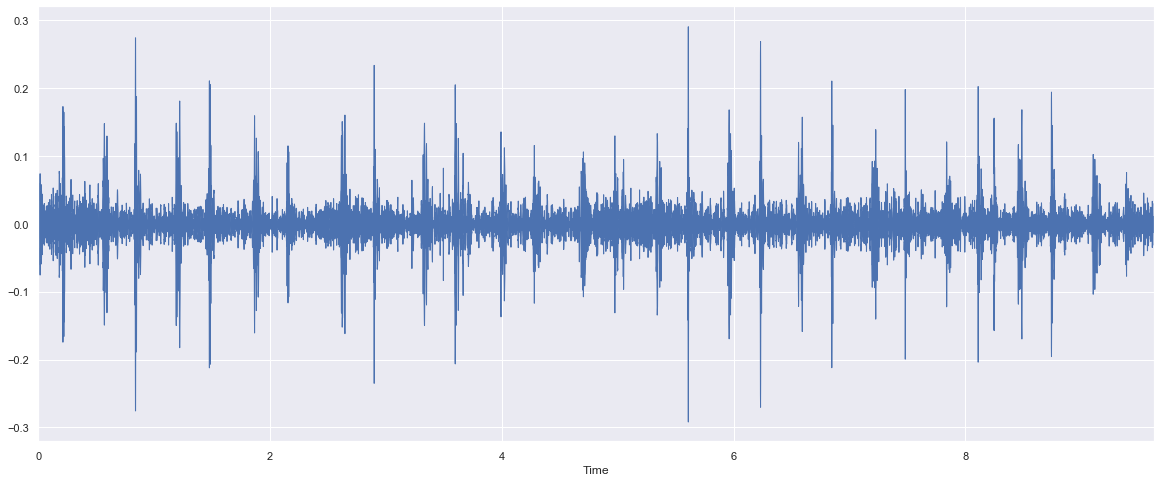

In [144]:
plt.figure(figsize=(20,8))
librosa.display.waveplot(x[0],sr=44000)

# Spectrogram

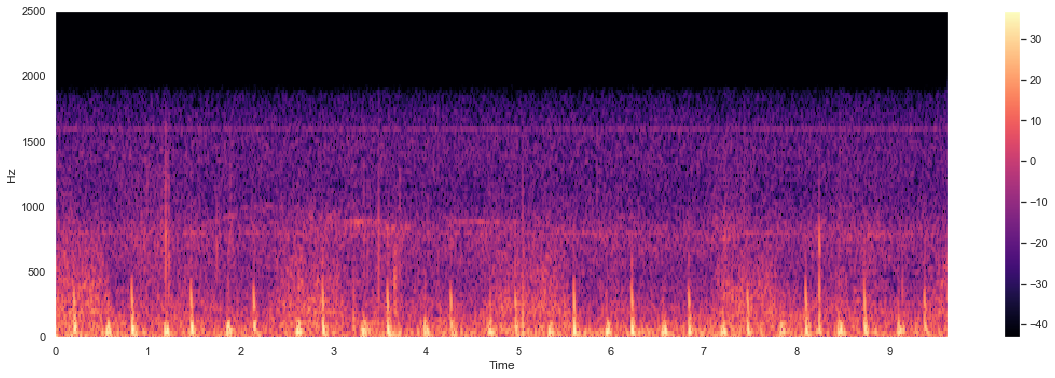

In [145]:
X=librosa.stft(x[0]) # Short Time Fourier Transformation -> Gives Fourier spectrum on each segment 

X_dB=librosa.amplitude_to_db(abs(X)) # converting in decibels

plt.figure(figsize=(20,6))
librosa.display.specshow(X_dB, sr=44000, x_axis='time', y_axis='hz')
plt.ylim(0, 2500)
plt.colorbar()

# MFCCs feature extraction

In [146]:
mfcc=pd.DataFrame(librosa.feature.mfcc(x[0],sr=44000)).T
mfcc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-482.183880,187.155737,91.359670,13.073121,-8.942874,7.069404,19.765105,11.631839,-2.664701,-4.686472,4.410677,10.603063,7.432533,1.941445,2.512189,7.773770,9.902316,5.298687,-1.525878,-4.030657
1,-477.313139,194.156744,97.309931,15.679192,-9.232511,7.933735,24.406996,17.072740,-1.615890,-8.556638,0.506355,10.468638,9.193728,1.465517,-0.541814,5.776986,11.391523,8.614648,0.495092,-4.571451
2,-473.896132,198.044214,98.943736,15.130805,-10.654378,7.095937,24.593915,17.607526,-1.430600,-8.444212,1.342760,11.832835,9.242175,-1.938915,-7.707865,-3.065661,3.740025,3.845053,-1.227968,-3.623537
3,-470.495077,201.897982,100.726185,15.216987,-11.353720,5.664502,21.591849,12.846771,-6.191626,-10.354155,3.587424,16.181963,11.534503,-4.458089,-13.878526,-8.814716,1.838018,5.920796,2.310550,-0.932086
4,-473.888248,197.460415,97.502828,14.013703,-10.614406,6.806859,20.824663,8.810899,-12.611665,-16.454704,0.441644,16.790629,14.630400,-0.915657,-11.171576,-6.981718,3.274325,6.962344,2.286065,-2.637034


In [147]:
pd.DataFrame(np.mean(mfcc)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-487.508747,180.531404,86.019461,7.912247,-13.222602,6.779134,24.641967,18.097617,1.159658,-2.52435,9.658396,19.723639,14.060928,-0.749736,-8.494861,-3.510008,4.919413,6.361764,1.543016,-1.277093


# Extract features for all files

In [148]:
def ExtractFeatures(audio):
    file_path=f'C:/Users/lenovo/Desktop/all folders/riya moto/Heart-sound-dataset/data/{audio}'
    x=librosa.load(file_path,sr=44000)
    mfcc=pd.DataFrame(librosa.feature.mfcc(x[0],sr=44000)).T
    result=np.mean(mfcc)
    return result

In [149]:
df=pd.DataFrame(columns=range(20))
for i,j in enumerate(hb.fname):
    df.loc[i]=ExtractFeatures(j)

In [150]:
cols=['X'+str(i) for i in range(20)]
df.columns=cols
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,-599.712597,33.745528,7.357553,4.608816,2.153271,2.742034,0.649770,-0.556784,-1.258609,-2.730455,-1.966396,-1.345332,-1.637813,-1.866740,-2.252484,-1.830874,-1.407416,-1.399965,-1.474844,-1.407473
1,-752.515415,26.768424,5.835378,-9.889740,4.392001,-11.210543,5.855111,-8.392827,6.406865,-7.285562,1.651388,-2.362741,-4.273285,2.308385,-5.639189,3.206788,-4.769094,1.579599,-3.353793,-0.015114
2,-588.449455,58.423528,-23.408028,7.265508,-15.303922,-0.974249,-5.492018,-7.134491,1.096837,-6.505763,-0.099588,-3.901013,-3.632757,-0.040714,-4.896223,1.673196,-4.122231,1.687070,-3.095510,1.242294
3,-350.262475,142.964657,-22.992239,24.916380,-4.299137,-2.592765,-9.511868,-7.536519,-9.004417,-4.057093,-6.994083,-7.958489,-8.094460,-3.569796,-8.015321,-1.789053,-5.239443,-0.358722,-4.822038,-2.069404
4,-334.699413,117.323817,-9.198461,7.338949,-0.535448,0.675712,0.349456,-5.948565,-4.682393,-8.755098,-2.695899,-5.317722,-7.339055,-7.543355,-6.955811,-1.600739,-3.716867,-5.282877,-6.206102,-5.320438


In [151]:
dfinal=pd.concat([hb,df],axis=1)
dfinal.drop(['index','dataset','fname','sublabel','total'],axis=1,inplace=True)

# Prepare for modelling
# Relabelling target column

In [152]:
dfinal.head()

,label,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,artifact,-599.712597,33.745528,7.357553,4.608816,2.153271,2.742034,0.649770,-0.556784,-1.258609,...,-1.966396,-1.345332,-1.637813,-1.866740,-2.252484,-1.830874,-1.407416,-1.399965,-1.474844,-1.407473
1,artifact,-752.515415,26.768424,5.835378,-9.889740,4.392001,-11.210543,5.855111,-8.392827,6.406865,...,1.651388,-2.362741,-4.273285,2.308385,-5.639189,3.206788,-4.769094,1.579599,-3.353793,-0.015114
2,artifact,-588.449455,58.423528,-23.408028,7.265508,-15.303922,-0.974249,-5.492018,-7.134491,1.096837,...,-0.099588,-3.901013,-3.632757,-0.040714,-4.896223,1.673196,-4.122231,1.687070,-3.095510,1.242294
3,artifact,-350.262475,142.964657,-22.992239,24.916380,-4.299137,-2.592765,-9.511868,-7.536519,-9.004417,...,-6.994083,-7.958489,-8.094460,-3.569796,-8.015321,-1.789053,-5.239443,-0.358722,-4.822038,-2.069404
4,artifact,-334.699413,117.323817,-9.198461,7.338949,-0.535448,0.675712,0.349456,-5.948565,-4.682393,...,-2.695899,-5.317722,-7.339055,-7.543355,-6.955811,-1.600739,-3.716867,-5.282877,-6.206102,-5.320438


In [153]:
dfinal.label.value_counts()

normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64

In [154]:
dct={'normal':1,
    'murmur':0,        
    'extrastole':0,    
    'artifact':0,   
    'extrahls':0}
dfinal.label=dfinal.label.map(dct)

In [155]:
dfinal.label.value_counts()

1    351
0    234
Name: label, dtype: int64

# Standard scaling

In [156]:
dfinal.drop('label',axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
X0,585.0,-425.421474,78.905790,-967.863774,-466.566221,-421.106054,-386.692243,53.402015
X1,585.0,147.304823,39.512778,-50.534968,132.619773,150.105662,171.826768,247.511636
X2,585.0,65.862332,29.044909,-73.298928,64.818308,74.744618,81.166968,113.224499
X3,585.0,12.545647,14.756068,-29.368672,3.998557,12.594454,21.042744,58.251923
X4,585.0,-3.752990,15.860401,-39.183430,-14.560718,-5.601823,2.143803,48.432672
X5,585.0,9.467128,8.209732,-17.933206,4.887756,9.680361,13.047644,38.783718
X6,585.0,22.332053,9.617739,-26.146337,18.559624,23.607771,28.317550,43.611053
X7,585.0,16.928591,8.699894,-35.927198,14.856970,19.205188,22.263124,47.938398
X8,585.0,3.884929,6.885703,-36.063695,0.101194,4.193985,7.822430,42.192601
X9,585.0,-1.904687,7.247406,-36.307074,-5.691201,-1.888662,1.933652,19.306962


In [157]:
dfinal.corr()['label']

label    1.000000
X0      -0.015107
X1       0.202067
X2       0.241354
X3      -0.215853
X4      -0.252329
X5       0.037162
X6       0.292935
X7       0.267528
X8      -0.071344
X9      -0.099143
X10      0.192636
X11      0.371323
X12      0.371620
X13      0.098534
X14     -0.065788
X15      0.067020
X16      0.335410
X17      0.325167
X18      0.131435
X19     -0.065439
Name: label, dtype: float64

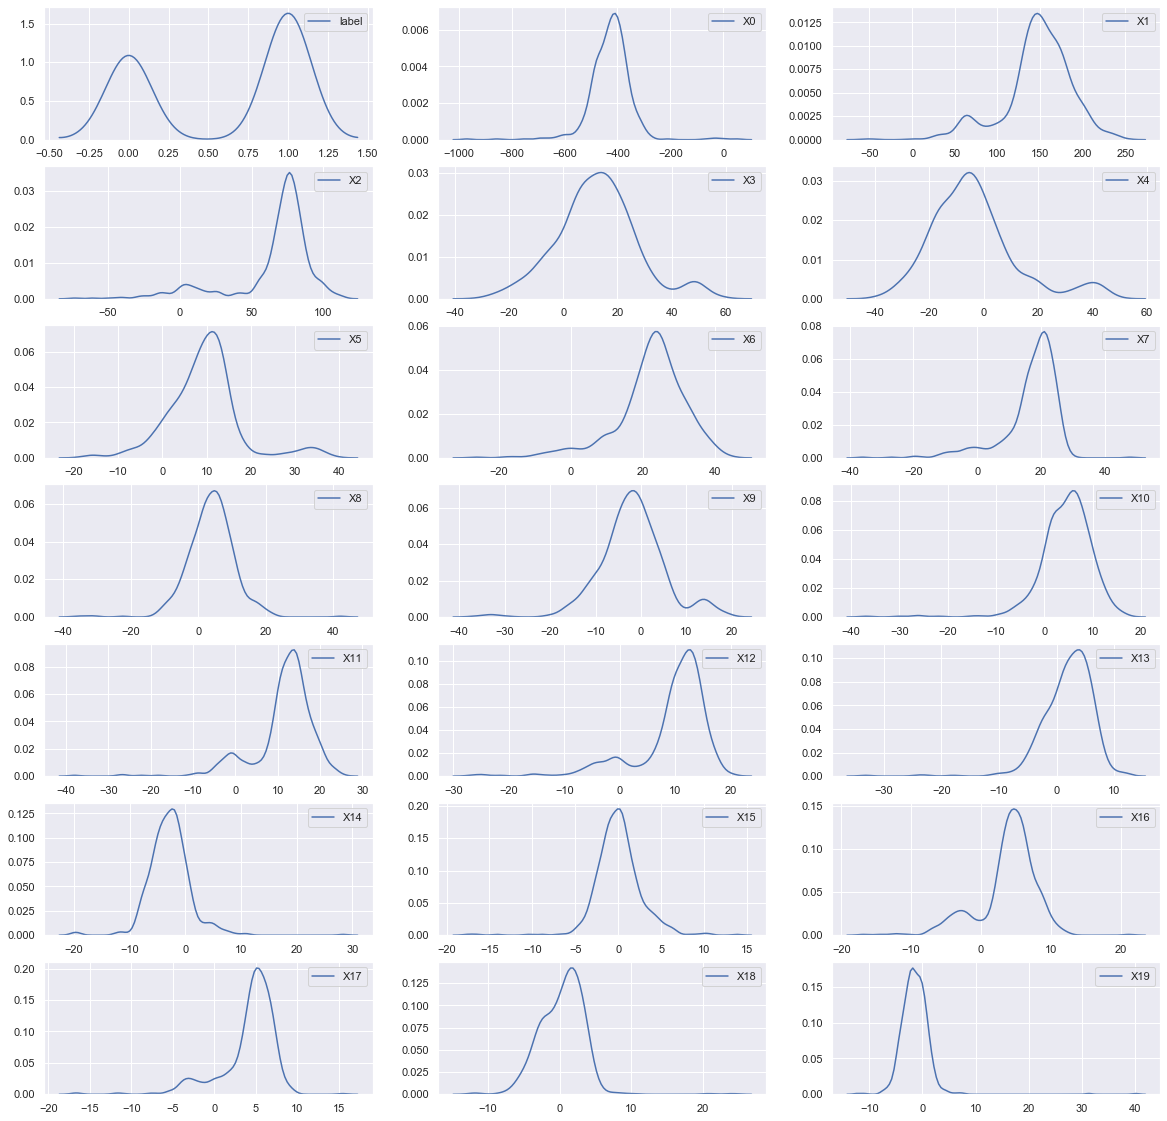

In [158]:
plt.figure(figsize=(20,20))

for i,col in enumerate(dfinal.columns,1):
    plt.subplot(7,3,i)
    sns.kdeplot(dfinal[col])

plt.show()

In [159]:
X=dfinal.drop('label',axis=1)
y=dfinal.label
scaler=StandardScaler()
scaler.fit(X)
X=pd.DataFrame(scaler.transform(X),index=X.index,columns=X.columns)

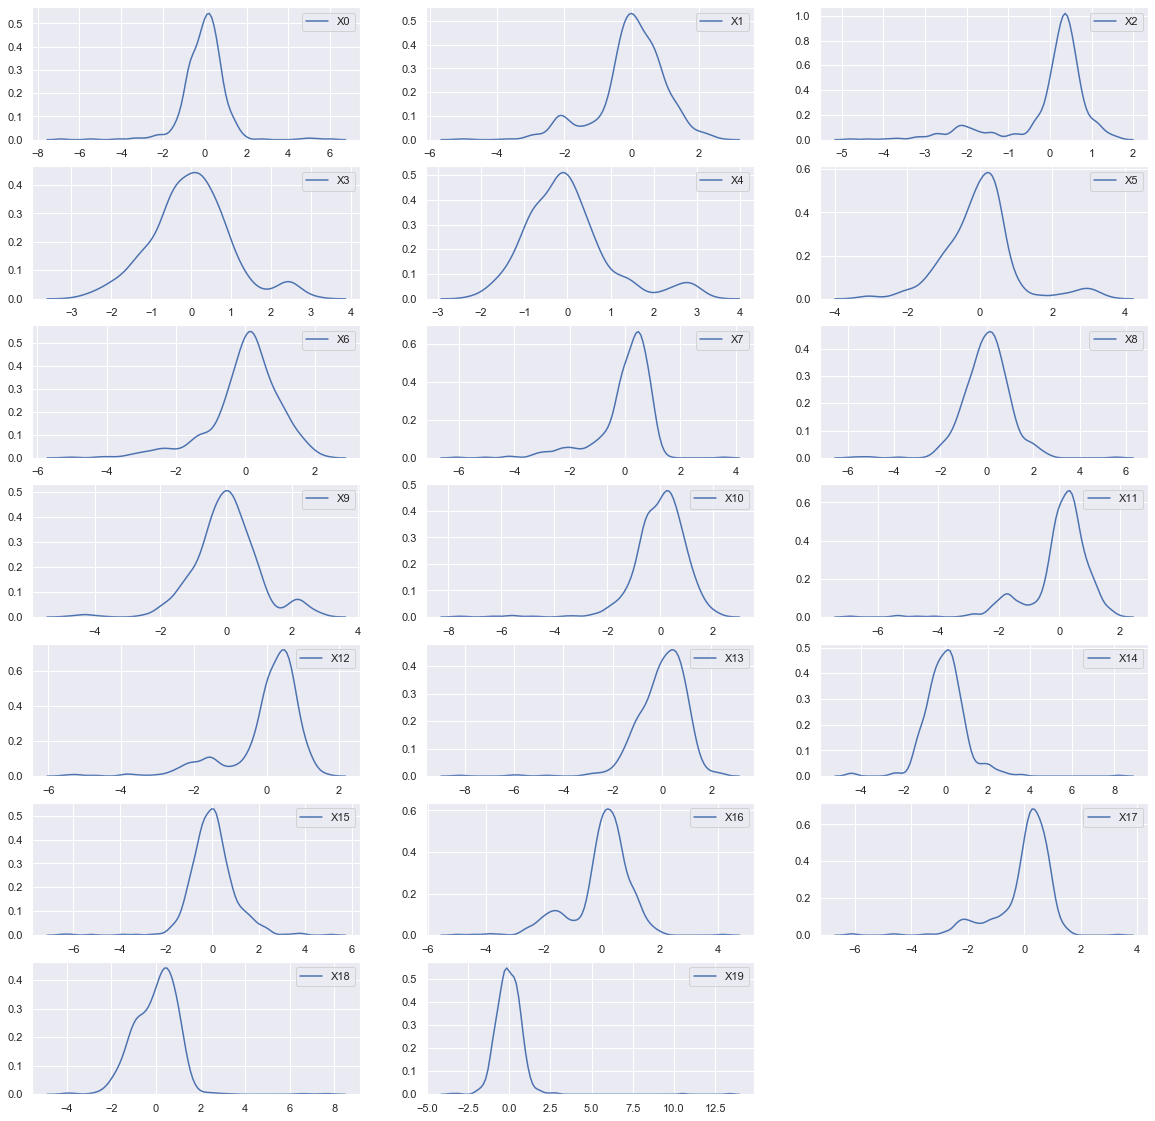

In [160]:
plt.figure(figsize=(20,20))

for i,col in enumerate(X.columns,1):
    plt.subplot(7,3,i)
    sns.kdeplot(X[col])

plt.show()

# Feature selection

In [161]:
X=dfinal.drop('label',axis=1)
y=dfinal.label

In [162]:
selector=SelectKBest(f_classif, k=6)
selection=selector.fit_transform(X,y)

# Models
## split

In [163]:
X_train, X_test,y_train,y_test = train_test_split(selection, \
                                                  dfinal.label, \
                                                  test_size=0.2, \
                                                  random_state=42, \
                                                  stratify=dfinal.label)

# Decision tree

In [164]:
model1=DecisionTreeClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[25, 22],
       [18, 52]], dtype=int64)

Accuracy 0.6581196581196581
Recall 0.7428571428571429
Precision 0.7027027027027027
F1 0.7222222222222223


# Ada boost

In [165]:
model2=AdaBoostClassifier()
model2.fit(X_train, y_train)
y_pred2=model2.predict(X_test)
conf2=confusion_matrix(y_test, y_pred2)
acc2=accuracy_score(y_test, y_pred2)
rec2=recall_score(y_test, y_pred2)
pre2=precision_score(y_test, y_pred2)
f12=f1_score(y_test, y_pred2)
display(conf2)
print('Accuracy', acc2)
print('Recall', rec2)
print('Precision', pre2)
print('F1', f12)

array([[22, 25],
       [15, 55]], dtype=int64)

Accuracy 0.6581196581196581
Recall 0.7857142857142857
Precision 0.6875
F1 0.7333333333333334


# Random forest

In [166]:
model3=RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred3=model3.predict(X_test)
conf3=confusion_matrix(y_test, y_pred3)
acc3=accuracy_score(y_test, y_pred3)
rec3=recall_score(y_test, y_pred3)
pre3=precision_score(y_test, y_pred3)
f13=f1_score(y_test, y_pred3)
display(conf3)
print('Accuracy', acc3)
print('Recall', rec3)
print('Precision', pre3)
print('F1', f13)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[29, 18],
       [25, 45]], dtype=int64)

Accuracy 0.6324786324786325
Recall 0.6428571428571429
Precision 0.7142857142857143
F1 0.6766917293233083


# Logistic regression

In [167]:
model4=LogisticRegression(max_iter=10000)
model4.fit(X_train, y_train)
y_pred4=model4.predict(X_test)
conf4=confusion_matrix(y_test, y_pred4)
acc4=accuracy_score(y_test, y_pred4)
rec4=recall_score(y_test, y_pred4)
pre4=precision_score(y_test, y_pred4)
f14=f1_score(y_test, y_pred4)
display(conf4)
print('Accuracy', acc4)
print('Recall', rec4)
print('Precision', pre4)
print('F1', f14)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[14, 33],
       [ 4, 66]], dtype=int64)

Accuracy 0.6837606837606838
Recall 0.9428571428571428
Precision 0.6666666666666666
F1 0.7810650887573964


# KNN

In [168]:
model5=KNeighborsClassifier(5)
model5.fit(X_train, y_train)
y_pred5=model5.predict(X_test)
conf5=confusion_matrix(y_test, y_pred5)
acc5=accuracy_score(y_test, y_pred5)
rec5=recall_score(y_test, y_pred5)
pre5=precision_score(y_test, y_pred5)
f15=f1_score(y_test, y_pred5)
display(conf5)
print('Accuracy', acc5)
print('Recall', rec5)
print('Precision', pre5)
print('F1', f15)

array([[25, 22],
       [14, 56]], dtype=int64)

Accuracy 0.6923076923076923
Recall 0.8
Precision 0.717948717948718
F1 0.7567567567567569


# Gaussian NB

In [169]:
model6=GaussianNB()
model6.fit(X_train, y_train)
y_pred6=model6.predict(X_test)
conf6=confusion_matrix(y_test, y_pred6)
acc6=accuracy_score(y_test, y_pred6)
rec6=recall_score(y_test, y_pred6)
pre6=precision_score(y_test, y_pred6)
f16=f1_score(y_test, y_pred6)
display(conf6)
print('Accuracy', acc6)
print('Recall', rec6)
print('Precision', pre6)
print('F1', f16)

array([[14, 33],
       [ 3, 67]], dtype=int64)

Accuracy 0.6923076923076923
Recall 0.9571428571428572
Precision 0.67
F1 0.7882352941176471


# SVC

In [170]:
model7=SVC()
model7.fit(X_train, y_train)
y_pred7=model7.predict(X_test)
conf7=confusion_matrix(y_test, y_pred7)
acc7=accuracy_score(y_test, y_pred7)
rec7=recall_score(y_test, y_pred7)
pre7=precision_score(y_test, y_pred7)
f17=f1_score(y_test, y_pred7)
display(conf7)
print('Accuracy', acc7)
print('Recall', rec7)
print('Precision', pre7)
print('F1', f17)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[16, 31],
       [14, 56]], dtype=int64)

Accuracy 0.6153846153846154
Recall 0.8
Precision 0.6436781609195402
F1 0.713375796178344


# XGB

In [171]:
model8=XGBClassifier()
model8.fit(X_train, y_train)
y_pred8=model8.predict(X_test)
conf8=confusion_matrix(y_test, y_pred8)
acc8=accuracy_score(y_test, y_pred8)
rec8=recall_score(y_test, y_pred8)
pre8=precision_score(y_test, y_pred8)
f18=f1_score(y_test, y_pred8)
display(conf8)
print('Accuracy', acc8)
print('Recall', rec8)
print('Precision', pre8)
print('F1', f18)

array([[25, 22],
       [15, 55]], dtype=int64)

Accuracy 0.6837606837606838
Recall 0.7857142857142857
Precision 0.7142857142857143
F1 0.7482993197278911


# Catboost

In [172]:
model9=CatBoostClassifier()
model9.fit(X_train, y_train)
y_pred9=model9.predict(X_test)
conf9=confusion_matrix(y_test, [eval(str(i)) for i in y_pred9])
acc9=accuracy_score(y_test, [eval(str(i)) for i in y_pred9])
rec9=recall_score(y_test, [eval(str(i)) for i in y_pred9])
pre9=precision_score(y_test, [eval(str(i)) for i in y_pred9])
f19=f1_score(y_test, [eval(str(i)) for i in y_pred9])
display(conf9)
print('Accuracy', acc9)
print('Recall', rec9)
print('Precision', pre9)
print('F1', f19)

Learning rate set to 0.00745
0:	learn: 0.6908217	total: 16.8ms	remaining: 16.8s
1:	learn: 0.6886072	total: 25.1ms	remaining: 12.5s
2:	learn: 0.6866543	total: 36.6ms	remaining: 12.2s
3:	learn: 0.6845919	total: 44.2ms	remaining: 11s
4:	learn: 0.6825981	total: 50.4ms	remaining: 10s
5:	learn: 0.6805938	total: 54.7ms	remaining: 9.06s
6:	learn: 0.6784210	total: 61ms	remaining: 8.65s
7:	learn: 0.6762190	total: 68ms	remaining: 8.43s
8:	learn: 0.6738824	total: 79.6ms	remaining: 8.77s
9:	learn: 0.6719410	total: 83.3ms	remaining: 8.25s
10:	learn: 0.6698888	total: 90.9ms	remaining: 8.18s
11:	learn: 0.6682022	total: 94.8ms	remaining: 7.81s
12:	learn: 0.6661522	total: 98.5ms	remaining: 7.47s
13:	learn: 0.6644960	total: 104ms	remaining: 7.31s
14:	learn: 0.6625979	total: 108ms	remaining: 7.08s
15:	learn: 0.6605892	total: 112ms	remaining: 6.86s
16:	learn: 0.6585793	total: 115ms	remaining: 6.66s
17:	learn: 0.6566990	total: 122ms	remaining: 6.63s
18:	learn: 0.6551769	total: 125ms	remaining: 6.46s
19:	lea

163:	learn: 0.5136778	total: 963ms	remaining: 4.91s
164:	learn: 0.5130377	total: 967ms	remaining: 4.89s
165:	learn: 0.5124492	total: 972ms	remaining: 4.88s
166:	learn: 0.5117641	total: 978ms	remaining: 4.88s
167:	learn: 0.5110461	total: 982ms	remaining: 4.86s
168:	learn: 0.5105546	total: 990ms	remaining: 4.87s
169:	learn: 0.5099332	total: 995ms	remaining: 4.86s
170:	learn: 0.5093139	total: 1s	remaining: 4.88s
171:	learn: 0.5087712	total: 1.01s	remaining: 4.86s
172:	learn: 0.5083674	total: 1.01s	remaining: 4.85s
173:	learn: 0.5079168	total: 1.02s	remaining: 4.85s
174:	learn: 0.5074957	total: 1.02s	remaining: 4.83s
175:	learn: 0.5070708	total: 1.03s	remaining: 4.82s
176:	learn: 0.5065959	total: 1.04s	remaining: 4.83s
177:	learn: 0.5062242	total: 1.04s	remaining: 4.81s
178:	learn: 0.5057700	total: 1.05s	remaining: 4.81s
179:	learn: 0.5053086	total: 1.05s	remaining: 4.79s
180:	learn: 0.5047904	total: 1.05s	remaining: 4.78s
181:	learn: 0.5044122	total: 1.06s	remaining: 4.76s
182:	learn: 0.5

340:	learn: 0.4409242	total: 1.77s	remaining: 3.42s
341:	learn: 0.4407215	total: 1.78s	remaining: 3.42s
342:	learn: 0.4404638	total: 1.78s	remaining: 3.42s
343:	learn: 0.4401416	total: 1.79s	remaining: 3.41s
344:	learn: 0.4397740	total: 1.79s	remaining: 3.4s
345:	learn: 0.4392308	total: 1.8s	remaining: 3.4s
346:	learn: 0.4388793	total: 1.8s	remaining: 3.39s
347:	learn: 0.4385181	total: 1.81s	remaining: 3.38s
348:	learn: 0.4382284	total: 1.81s	remaining: 3.38s
349:	learn: 0.4378973	total: 1.82s	remaining: 3.38s
350:	learn: 0.4377236	total: 1.82s	remaining: 3.37s
351:	learn: 0.4372744	total: 1.83s	remaining: 3.36s
352:	learn: 0.4370037	total: 1.83s	remaining: 3.35s
353:	learn: 0.4366638	total: 1.83s	remaining: 3.35s
354:	learn: 0.4362260	total: 1.84s	remaining: 3.34s
355:	learn: 0.4359224	total: 1.84s	remaining: 3.33s
356:	learn: 0.4352417	total: 1.85s	remaining: 3.33s
357:	learn: 0.4349782	total: 1.85s	remaining: 3.32s
358:	learn: 0.4347320	total: 1.85s	remaining: 3.31s
359:	learn: 0.43

529:	learn: 0.3891328	total: 2.59s	remaining: 2.29s
530:	learn: 0.3888490	total: 2.59s	remaining: 2.29s
531:	learn: 0.3886657	total: 2.6s	remaining: 2.29s
532:	learn: 0.3883943	total: 2.6s	remaining: 2.28s
533:	learn: 0.3880831	total: 2.6s	remaining: 2.27s
534:	learn: 0.3877547	total: 2.61s	remaining: 2.27s
535:	learn: 0.3875942	total: 2.62s	remaining: 2.27s
536:	learn: 0.3873739	total: 2.62s	remaining: 2.26s
537:	learn: 0.3871382	total: 2.63s	remaining: 2.26s
538:	learn: 0.3868477	total: 2.63s	remaining: 2.25s
539:	learn: 0.3865506	total: 2.64s	remaining: 2.25s
540:	learn: 0.3862911	total: 2.64s	remaining: 2.24s
541:	learn: 0.3860380	total: 2.65s	remaining: 2.24s
542:	learn: 0.3856809	total: 2.65s	remaining: 2.23s
543:	learn: 0.3854890	total: 2.66s	remaining: 2.23s
544:	learn: 0.3853506	total: 2.66s	remaining: 2.22s
545:	learn: 0.3852054	total: 2.66s	remaining: 2.21s
546:	learn: 0.3849399	total: 2.67s	remaining: 2.21s
547:	learn: 0.3846518	total: 2.67s	remaining: 2.2s
548:	learn: 0.38

717:	learn: 0.3466001	total: 3.4s	remaining: 1.33s
718:	learn: 0.3463415	total: 3.4s	remaining: 1.33s
719:	learn: 0.3461155	total: 3.4s	remaining: 1.32s
720:	learn: 0.3458680	total: 3.41s	remaining: 1.32s
721:	learn: 0.3457035	total: 3.41s	remaining: 1.31s
722:	learn: 0.3454958	total: 3.42s	remaining: 1.31s
723:	learn: 0.3452241	total: 3.42s	remaining: 1.3s
724:	learn: 0.3450188	total: 3.43s	remaining: 1.3s
725:	learn: 0.3448202	total: 3.44s	remaining: 1.3s
726:	learn: 0.3446051	total: 3.44s	remaining: 1.29s
727:	learn: 0.3444215	total: 3.45s	remaining: 1.29s
728:	learn: 0.3442292	total: 3.45s	remaining: 1.28s
729:	learn: 0.3438637	total: 3.46s	remaining: 1.28s
730:	learn: 0.3437051	total: 3.46s	remaining: 1.27s
731:	learn: 0.3434727	total: 3.46s	remaining: 1.27s
732:	learn: 0.3433157	total: 3.47s	remaining: 1.26s
733:	learn: 0.3431405	total: 3.47s	remaining: 1.26s
734:	learn: 0.3429386	total: 3.48s	remaining: 1.25s
735:	learn: 0.3427136	total: 3.48s	remaining: 1.25s
736:	learn: 0.3424

906:	learn: 0.3062374	total: 4.21s	remaining: 432ms
907:	learn: 0.3061220	total: 4.22s	remaining: 427ms
908:	learn: 0.3058422	total: 4.22s	remaining: 423ms
909:	learn: 0.3055979	total: 4.23s	remaining: 418ms
910:	learn: 0.3054038	total: 4.23s	remaining: 413ms
911:	learn: 0.3052579	total: 4.23s	remaining: 409ms
912:	learn: 0.3049585	total: 4.24s	remaining: 404ms
913:	learn: 0.3047704	total: 4.25s	remaining: 400ms
914:	learn: 0.3045476	total: 4.25s	remaining: 395ms
915:	learn: 0.3042678	total: 4.25s	remaining: 390ms
916:	learn: 0.3039829	total: 4.26s	remaining: 386ms
917:	learn: 0.3037738	total: 4.26s	remaining: 381ms
918:	learn: 0.3034952	total: 4.27s	remaining: 376ms
919:	learn: 0.3033322	total: 4.27s	remaining: 372ms
920:	learn: 0.3031633	total: 4.28s	remaining: 367ms
921:	learn: 0.3029558	total: 4.28s	remaining: 362ms
922:	learn: 0.3025429	total: 4.29s	remaining: 358ms
923:	learn: 0.3022846	total: 4.29s	remaining: 353ms
924:	learn: 0.3021517	total: 4.29s	remaining: 348ms
925:	learn: 

array([[25, 22],
       [12, 58]], dtype=int64)

Accuracy 0.7094017094017094
Recall 0.8285714285714286
Precision 0.725
F1 0.7733333333333333


# Recap

In [173]:
recap=pd.DataFrame(columns=['Accuracy','Recall','Precision','F1'])
for i in range(1,10):
    recap.loc[i-1]=[eval('acc'+str(i)),eval('rec'+str(i)),eval('pre'+str(i)),eval('f1'+str(i))]

In [174]:
recap=recap.T
recap.columns=[f'model{i}' for i in range(1,10)]
recap=recap.T
recap.sort_values(by='F1',ascending=False)

,Accuracy,Recall,Precision,F1
model6,0.692308,0.957143,0.670000,0.788235
model4,0.683761,0.942857,0.666667,0.781065
model9,0.709402,0.828571,0.725000,0.773333
model5,0.692308,0.800000,0.717949,0.756757
model8,0.683761,0.785714,0.714286,0.748299
model2,0.658120,0.785714,0.687500,0.733333
model1,0.658120,0.742857,0.702703,0.722222
model7,0.615385,0.800000,0.643678,0.713376
model3,0.632479,0.642857,0.714286,0.676692


In [175]:
recap=pd.DataFrame(columns=['Accuracy','Recall','Precision','F1'])
for i in range(1,10):
    recap.loc[i-1]=[eval('acc'+str(i)),eval('rec'+str(i)),eval('pre'+str(i)),eval('f1'+str(i))]

recap.index=[f'model{i}' for i in range(1,10)]
recap.sort_values(by='F1',ascending=False)

,Accuracy,Recall,Precision,F1
model6,0.692308,0.957143,0.670000,0.788235
model4,0.683761,0.942857,0.666667,0.781065
model9,0.709402,0.828571,0.725000,0.773333
model5,0.692308,0.800000,0.717949,0.756757
model8,0.683761,0.785714,0.714286,0.748299
model2,0.658120,0.785714,0.687500,0.733333
model1,0.658120,0.742857,0.702703,0.722222
model7,0.615385,0.800000,0.643678,0.713376
model3,0.632479,0.642857,0.714286,0.676692


In [176]:
# model1 decision tree
# model2 adaboost
# model3 random forest
# model4 logistic regressionn
# model5 KNN
# model6 Gaussian NB
# model7 SVC
# model8 XGB
# model9 Catboost

In [177]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Acurracy of train ',(model.score(X_train, y_train)*100))
print('Acurracy of test ',(accuracy_score(y_test, y_pred)*100))

Acurracy of train  98.93162393162393
Acurracy of test  64.1025641025641


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


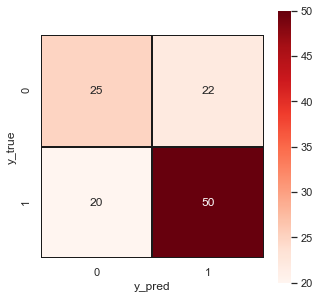

In [178]:
cm1 = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm1,annot = True,cmap='Reds',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [180]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54        47
           1       0.69      0.71      0.70        70

    accuracy                           0.64       117
   macro avg       0.62      0.62      0.62       117
weighted avg       0.64      0.64      0.64       117



In [181]:
model = CatBoostClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Acurracy of train ',(model.score(X_train, y_train)*100))
print('Acurracy of test ',(accuracy_score(y_test, y_pred)*100))

Learning rate set to 0.00745
0:	learn: 0.6908217	total: 4ms	remaining: 3.99s
1:	learn: 0.6886072	total: 7.93ms	remaining: 3.96s
2:	learn: 0.6866543	total: 11.4ms	remaining: 3.77s
3:	learn: 0.6845919	total: 15ms	remaining: 3.74s
4:	learn: 0.6825981	total: 21.6ms	remaining: 4.29s
5:	learn: 0.6805938	total: 25.4ms	remaining: 4.2s
6:	learn: 0.6784210	total: 29.1ms	remaining: 4.13s
7:	learn: 0.6762190	total: 32.8ms	remaining: 4.07s
8:	learn: 0.6738824	total: 36.9ms	remaining: 4.07s
9:	learn: 0.6719410	total: 40.6ms	remaining: 4.02s
10:	learn: 0.6698888	total: 44.2ms	remaining: 3.97s
11:	learn: 0.6682022	total: 49.7ms	remaining: 4.09s
12:	learn: 0.6661522	total: 53.3ms	remaining: 4.05s
13:	learn: 0.6644960	total: 57ms	remaining: 4.01s
14:	learn: 0.6625979	total: 60.6ms	remaining: 3.98s
15:	learn: 0.6605892	total: 65.6ms	remaining: 4.04s
16:	learn: 0.6585793	total: 69.3ms	remaining: 4s
17:	learn: 0.6566990	total: 72.9ms	remaining: 3.98s
18:	learn: 0.6551769	total: 76.5ms	remaining: 3.95s
19:	

183:	learn: 0.5032782	total: 806ms	remaining: 3.57s
184:	learn: 0.5025215	total: 810ms	remaining: 3.57s
185:	learn: 0.5019193	total: 816ms	remaining: 3.57s
186:	learn: 0.5013555	total: 822ms	remaining: 3.58s
187:	learn: 0.5011033	total: 834ms	remaining: 3.6s
188:	learn: 0.5003682	total: 840ms	remaining: 3.6s
189:	learn: 0.4997808	total: 847ms	remaining: 3.61s
190:	learn: 0.4991624	total: 850ms	remaining: 3.6s
191:	learn: 0.4986930	total: 856ms	remaining: 3.6s
192:	learn: 0.4983179	total: 861ms	remaining: 3.6s
193:	learn: 0.4975550	total: 864ms	remaining: 3.59s
194:	learn: 0.4971453	total: 871ms	remaining: 3.6s
195:	learn: 0.4967738	total: 875ms	remaining: 3.59s
196:	learn: 0.4963368	total: 878ms	remaining: 3.58s
197:	learn: 0.4957942	total: 883ms	remaining: 3.58s
198:	learn: 0.4955416	total: 887ms	remaining: 3.57s
199:	learn: 0.4949177	total: 891ms	remaining: 3.56s
200:	learn: 0.4943991	total: 894ms	remaining: 3.55s
201:	learn: 0.4939373	total: 899ms	remaining: 3.55s
202:	learn: 0.4936

376:	learn: 0.4295316	total: 1.77s	remaining: 2.93s
377:	learn: 0.4293056	total: 1.78s	remaining: 2.92s
378:	learn: 0.4289697	total: 1.78s	remaining: 2.92s
379:	learn: 0.4286299	total: 1.78s	remaining: 2.91s
380:	learn: 0.4283299	total: 1.79s	remaining: 2.91s
381:	learn: 0.4280582	total: 1.79s	remaining: 2.9s
382:	learn: 0.4276914	total: 1.8s	remaining: 2.9s
383:	learn: 0.4274181	total: 1.8s	remaining: 2.89s
384:	learn: 0.4271304	total: 1.81s	remaining: 2.89s
385:	learn: 0.4267172	total: 1.81s	remaining: 2.88s
386:	learn: 0.4265073	total: 1.82s	remaining: 2.88s
387:	learn: 0.4262013	total: 1.82s	remaining: 2.87s
388:	learn: 0.4258355	total: 1.83s	remaining: 2.87s
389:	learn: 0.4255506	total: 1.83s	remaining: 2.87s
390:	learn: 0.4253524	total: 1.83s	remaining: 2.86s
391:	learn: 0.4250060	total: 1.84s	remaining: 2.85s
392:	learn: 0.4246371	total: 1.84s	remaining: 2.85s
393:	learn: 0.4244137	total: 1.85s	remaining: 2.84s
394:	learn: 0.4241480	total: 1.85s	remaining: 2.84s
395:	learn: 0.42

564:	learn: 0.3808000	total: 2.58s	remaining: 1.98s
565:	learn: 0.3806445	total: 2.58s	remaining: 1.98s
566:	learn: 0.3804664	total: 2.58s	remaining: 1.97s
567:	learn: 0.3803466	total: 2.59s	remaining: 1.97s
568:	learn: 0.3800196	total: 2.59s	remaining: 1.96s
569:	learn: 0.3796754	total: 2.6s	remaining: 1.96s
570:	learn: 0.3793865	total: 2.6s	remaining: 1.96s
571:	learn: 0.3791555	total: 2.61s	remaining: 1.95s
572:	learn: 0.3789532	total: 2.61s	remaining: 1.95s
573:	learn: 0.3787075	total: 2.62s	remaining: 1.94s
574:	learn: 0.3784557	total: 2.62s	remaining: 1.94s
575:	learn: 0.3781858	total: 2.63s	remaining: 1.93s
576:	learn: 0.3780100	total: 2.63s	remaining: 1.93s
577:	learn: 0.3776734	total: 2.63s	remaining: 1.92s
578:	learn: 0.3775743	total: 2.64s	remaining: 1.92s
579:	learn: 0.3774207	total: 2.64s	remaining: 1.91s
580:	learn: 0.3772509	total: 2.64s	remaining: 1.91s
581:	learn: 0.3770962	total: 2.65s	remaining: 1.9s
582:	learn: 0.3769275	total: 2.65s	remaining: 1.9s
583:	learn: 0.37

749:	learn: 0.3395462	total: 3.37s	remaining: 1.12s
750:	learn: 0.3394286	total: 3.38s	remaining: 1.12s
751:	learn: 0.3391991	total: 3.38s	remaining: 1.11s
752:	learn: 0.3388728	total: 3.38s	remaining: 1.11s
753:	learn: 0.3385610	total: 3.39s	remaining: 1.1s
754:	learn: 0.3383007	total: 3.4s	remaining: 1.1s
755:	learn: 0.3381091	total: 3.4s	remaining: 1.1s
756:	learn: 0.3379102	total: 3.41s	remaining: 1.09s
757:	learn: 0.3377049	total: 3.41s	remaining: 1.09s
758:	learn: 0.3374452	total: 3.42s	remaining: 1.08s
759:	learn: 0.3371728	total: 3.42s	remaining: 1.08s
760:	learn: 0.3369194	total: 3.43s	remaining: 1.08s
761:	learn: 0.3367354	total: 3.43s	remaining: 1.07s
762:	learn: 0.3365172	total: 3.44s	remaining: 1.07s
763:	learn: 0.3362668	total: 3.44s	remaining: 1.06s
764:	learn: 0.3361206	total: 3.44s	remaining: 1.06s
765:	learn: 0.3360300	total: 3.45s	remaining: 1.05s
766:	learn: 0.3358218	total: 3.45s	remaining: 1.05s
767:	learn: 0.3354976	total: 3.46s	remaining: 1.04s
768:	learn: 0.335

931:	learn: 0.3008087	total: 4.17s	remaining: 304ms
932:	learn: 0.3005970	total: 4.17s	remaining: 300ms
933:	learn: 0.3003906	total: 4.18s	remaining: 295ms
934:	learn: 0.3001994	total: 4.18s	remaining: 291ms
935:	learn: 0.3000195	total: 4.19s	remaining: 287ms
936:	learn: 0.2999266	total: 4.19s	remaining: 282ms
937:	learn: 0.2996395	total: 4.2s	remaining: 277ms
938:	learn: 0.2993035	total: 4.21s	remaining: 273ms
939:	learn: 0.2991199	total: 4.21s	remaining: 269ms
940:	learn: 0.2988220	total: 4.21s	remaining: 264ms
941:	learn: 0.2985961	total: 4.21s	remaining: 260ms
942:	learn: 0.2983254	total: 4.22s	remaining: 255ms
943:	learn: 0.2980421	total: 4.22s	remaining: 251ms
944:	learn: 0.2979303	total: 4.23s	remaining: 246ms
945:	learn: 0.2977366	total: 4.23s	remaining: 242ms
946:	learn: 0.2975845	total: 4.24s	remaining: 237ms
947:	learn: 0.2973003	total: 4.24s	remaining: 233ms
948:	learn: 0.2971438	total: 4.24s	remaining: 228ms
949:	learn: 0.2969491	total: 4.25s	remaining: 224ms
950:	learn: 0